# Cut-back measurements technique implemented for the characterization of Si3Ni4 waveguides.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
from numpy.polynomial import Polynomial

# Preprocessing

In [2]:
listOfDir = {'A':"A-1.08 cm.txt",
             'B':"B-4.05 cm.txt",
             'C':"C-1.32 cm.txt",
             'D':"D-1.56 cm.txt",
             'E':"E-3.12 cm.txt",
             'F':"F-2.52 cm.txt",
             'G':"G-2.16 cm.txt",
             'H':"H-3.66 cm.txt",
             'IS':"Initial Spectrum.txt"}
Length = [1.08,4.05,1.32,1.56,3.12,2.52,2.16,3.66]
def load_file(dir):
    df = pd.read_csv("data/"+dir, sep="\t", header=None)
    return df

def turn_df_to_float(df):
    h,w = df.shape
    for i in range(h):
        for j in range(w):
            df.iloc[i,j] = str(df.iloc[i,j]).replace(',','.')
            df.iloc[i,j] = float(df.iloc[i,j])
    return df

In [3]:
for waveguide in listOfDir.keys():
    df_temp = load_file(listOfDir[waveguide])
    df_temp = turn_df_to_float(df_temp)
    exec(f'{waveguide} = df_temp')

In [30]:
#Merging data into one dataframe (df_all)

df_all = pd.DataFrame()
df_all['Wavelength']=list(A.iloc[:,0])
for waveguide in listOfDir.keys():
    exec(f'df_all[str({waveguide})]=list({waveguide}.iloc[:,1])')
df_all.columns = ['Wavelength']+list(listOfDir.keys())
df_all

,Wavelength,A,B,C,D,E,F,G,H,IS
0,1485.00,-25.076,-26.240,-25.513,-25.598,-25.829,-25.328,-25.188,-26.558,-3.0
1,1485.05,-25.382,-26.114,-25.445,-25.392,-25.713,-25.582,-25.590,-26.559,-3.0
2,1485.10,-25.467,-26.091,-25.512,-25.165,-25.954,-25.458,-25.132,-26.422,-3.0
3,1485.15,-25.141,-26.151,-25.227,-25.338,-25.618,-25.461,-25.074,-26.244,-3.0
4,1485.20,-25.163,-25.907,-25.277,-25.221,-26.239,-25.736,-25.391,-26.293,-3.0
5,1485.25,-25.269,-26.066,-25.206,-25.582,-26.158,-25.226,-25.264,-26.254,-3.0
6,1485.30,-24.986,-26.315,-25.266,-25.382,-25.829,-25.496,-25.147,-26.293,-3.0
7,1485.35,-25.259,-26.101,-25.099,-25.284,-26.063,-25.278,-25.421,-26.418,-3.0
8,1485.40,-24.966,-26.027,-25.211,-25.449,-25.851,-25.492,-25.607,-26.441,-3.0
9,1485.45,-24.977,-26.111,-25.427,-25.415,-26.033,-25.490,-25.532,-26.333,-3.0


# FtF Loss

$FtF Loss = P_{out} - P_{in} - 2dB$

In [5]:
for i in range(1,len(df_all.T)-1):
    df_all.iloc[:,i] = df_all.iloc[:,i]-df_all.iloc[:,-1]-2
FtfLoss = df_all

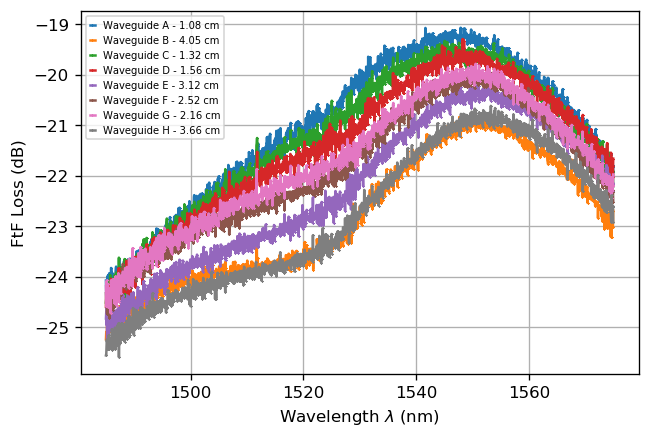

In [6]:
params = {'legend.fontsize': 6,
          'legend.handlelength': 0.5}
plt.rcParams.update(params)
plt.figure(dpi=120)
for i in range(1,len(df_all.T)-1):
    plt.plot(FtfLoss.iloc[:,0],FtfLoss.iloc[:,i], marker='.',label='Waveguide '+chr(64+i)+' - '+str(Length[i-1])+' cm', markersize=0.000000001)
plt.ylabel('FtF Loss (dB)')
plt.xlabel('Wavelength $\lambda$ (nm)')
plt.grid(True)
plt.legend(loc=2)
plt.savefig('output/FtfLoss.png',dpi=300)
plt.show()

## Linear Fitting

In [7]:
indices = [float(i) for i in range(1485,1574,5)]
FtfLoss_Step5 = FtfLoss.set_index('Wavelength')
FtfLoss_Step5 = FtfLoss_Step5.loc[indices]

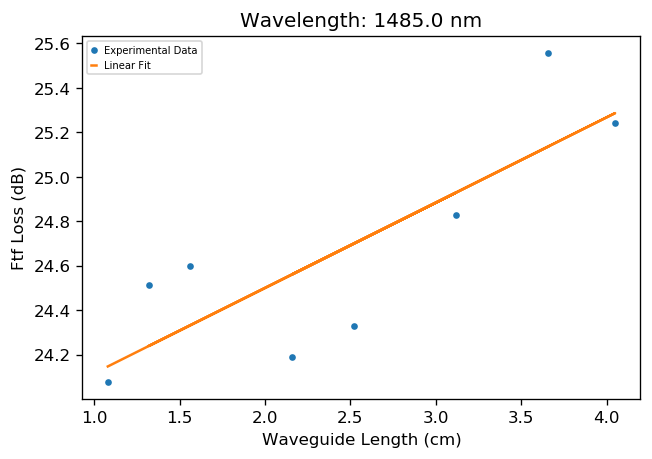

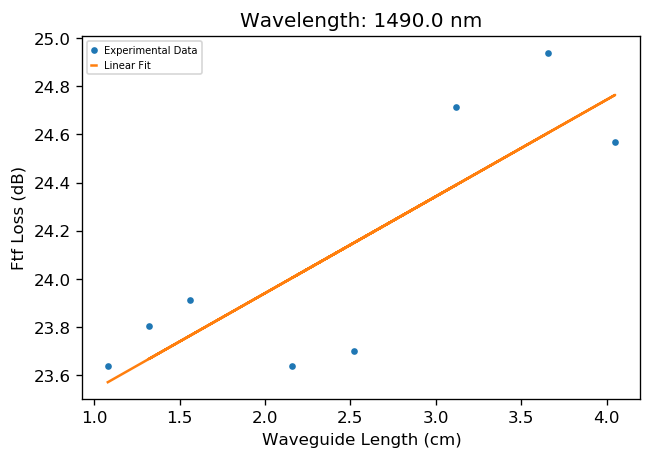

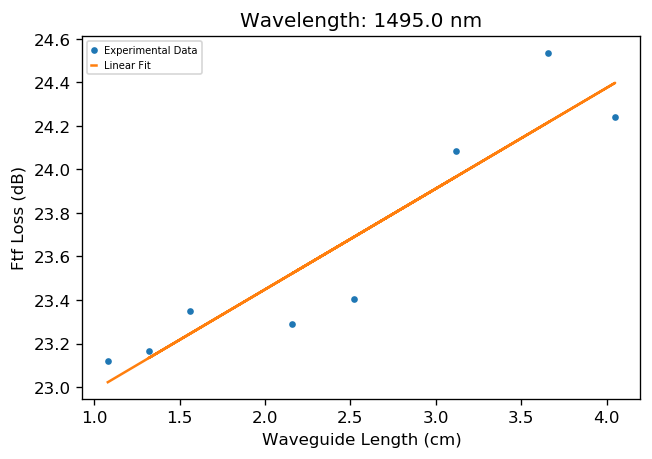

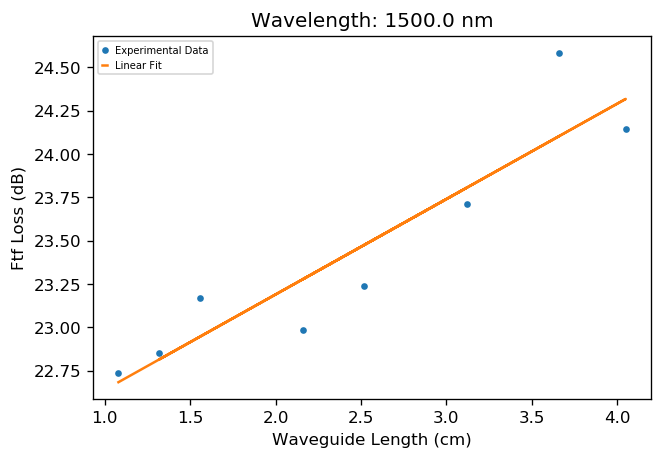

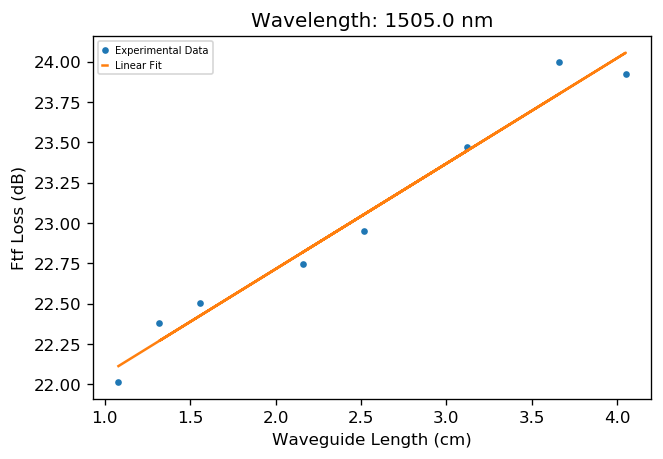

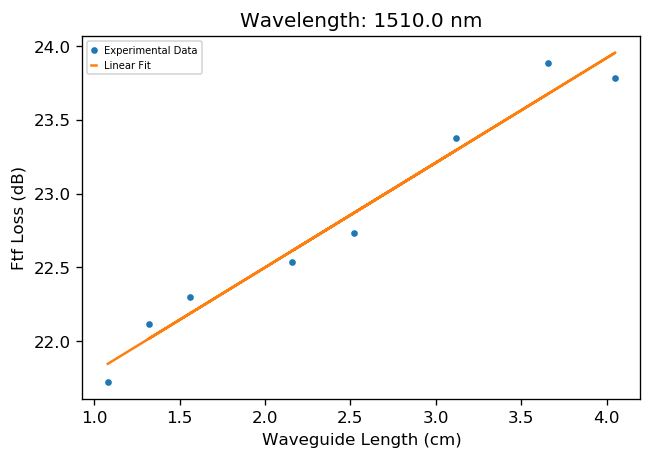

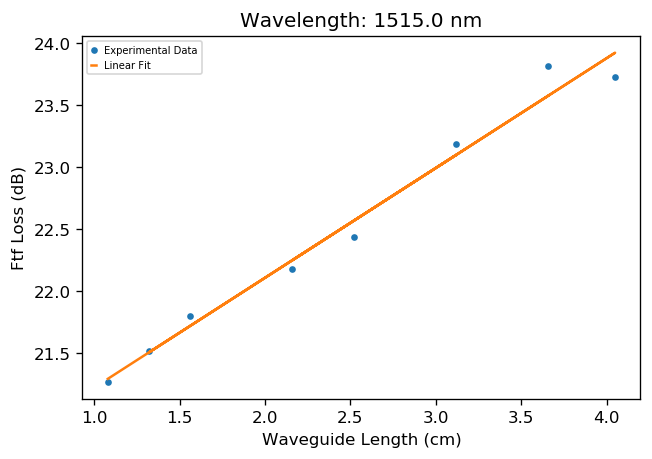

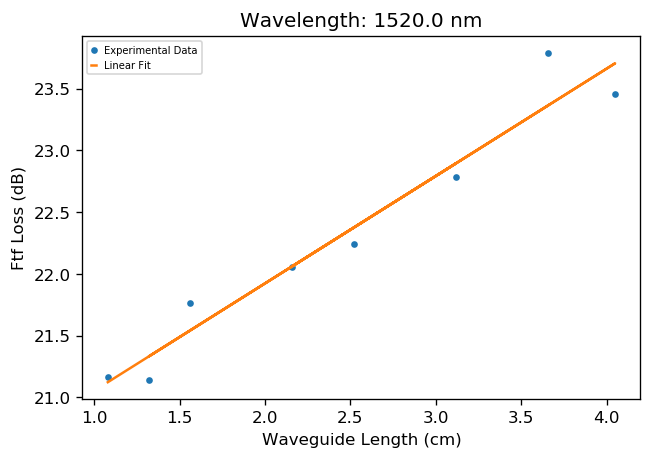

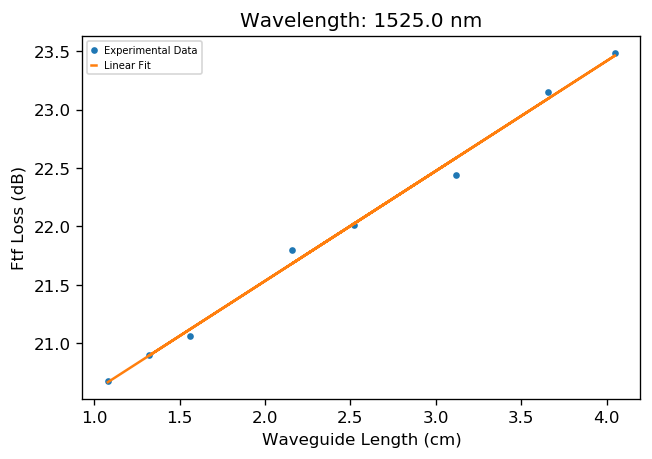

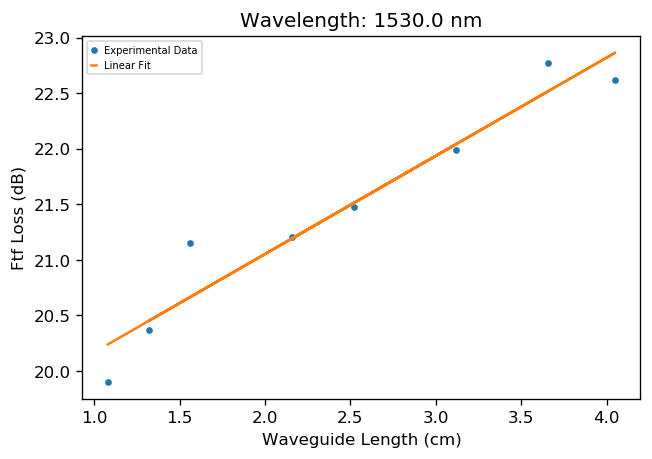

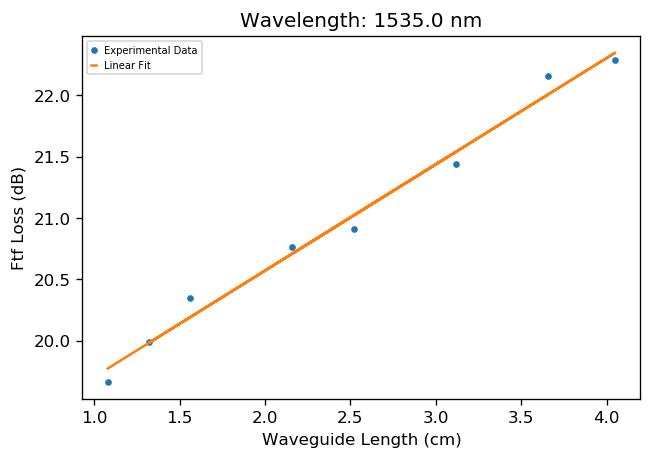

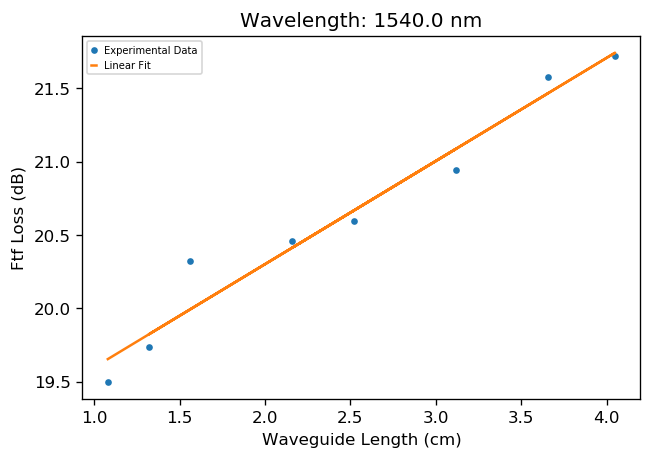

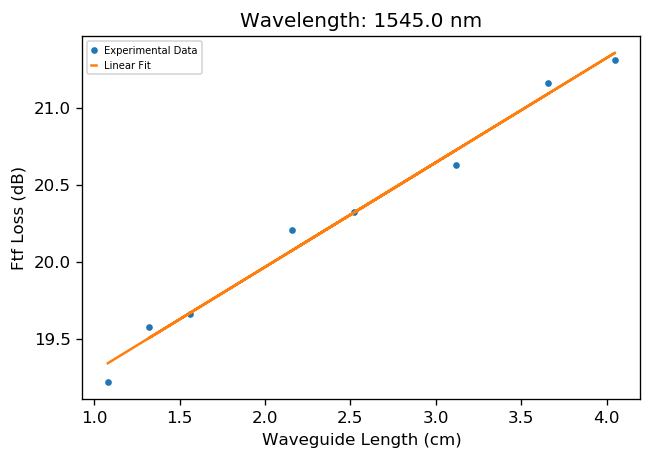

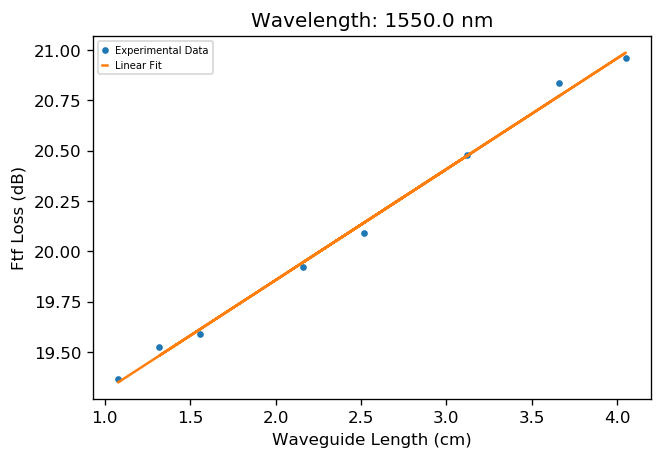

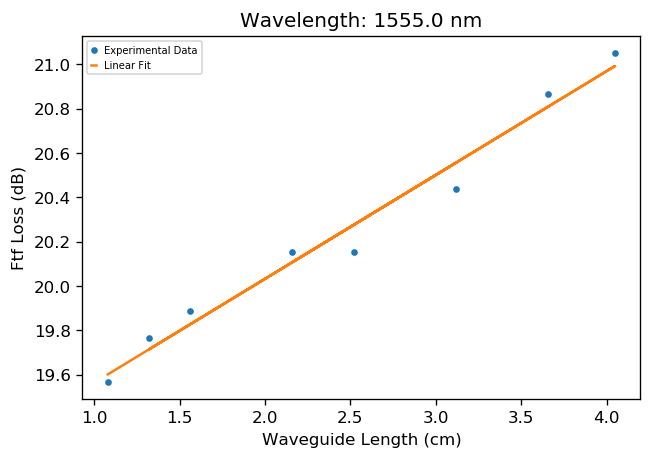

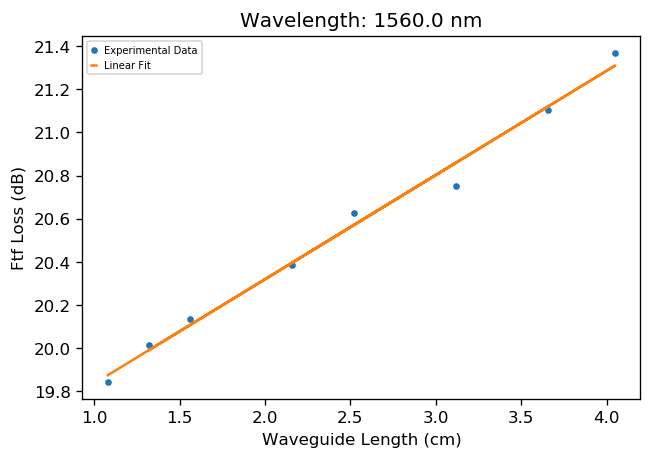

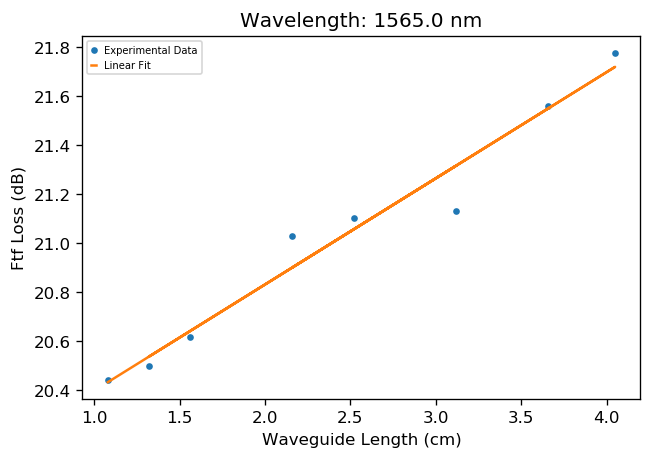

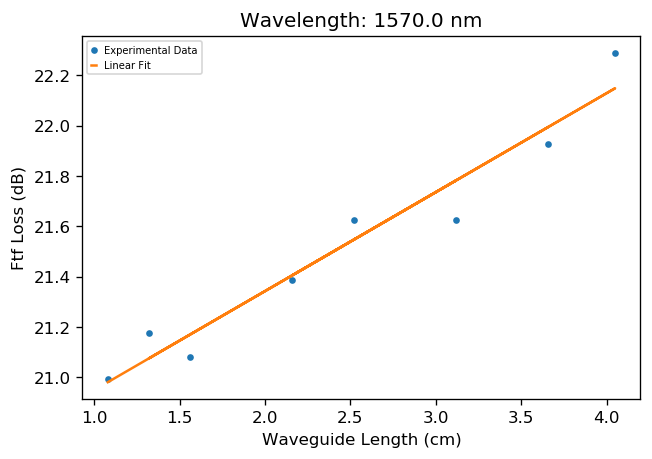

In [8]:
mlist = []
for i in range(18):
    x = np.array(Length)
    y = -np.array(list(FtfLoss_Step5.iloc[i,:-1]))
    b, m = polyfit(x, y, 1)
    mlist.append(m)
    params = {'legend.fontsize': 6,
          'legend.handlelength': 0.5}
    plt.rcParams.update(params)
    plt.figure(dpi=120)
    plt.title('Wavelength: {} nm'.format(str(indices[i])))
    plt.ylabel('Ftf Loss (dB)')
    plt.xlabel('Waveguide Length (cm)')
    plt.plot(x, y, '.',label = 'Experimental Data')
    plt.plot(x, b + m * x, '-',label='Linear Fit')
    plt.legend()
    plt.savefig('output/LinearFit'+str(indices[i])+'.png',dpi=300)
    plt.show()

# Propagation Loss

In [9]:
a = []
for i in range(len(mlist)):
    a.append(np.mean(np.array(Length)*mlist[i]))

In [10]:
x = np.array(indices)
y = -np.array(a)

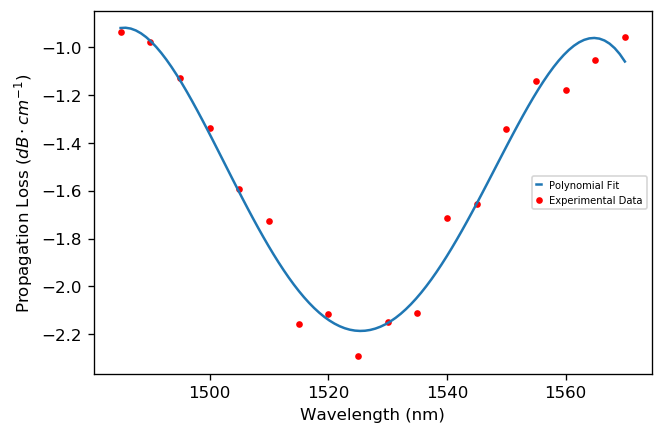

In [11]:
params = {'legend.fontsize': 6,
      'legend.handlelength': 0.5}
plt.rcParams.update(params)
plt.figure(dpi=120)
p = Polynomial.fit(x, y, 4)
plt.plot(*p.linspace(),label='Polynomial Fit')
plt.scatter(x,y,label = 'Experimental Data',marker='.',color='red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Propagation Loss ($dB \cdot cm^{-1}$)')
plt.legend(loc=7)
plt.savefig('output/PropagationLoss.png',dpi=300)
plt.show()

# GC Loss

$GC Loss = \frac{Ftf Loss - Propagation Loss}{2}$

In [14]:
PropagationLoss = p(np.array(FtfLoss.loc[:,'Wavelength']))
GCLossA = (np.array(FtfLoss.loc[:,'A'])-PropagationLoss)/2
GCLossB = (np.array(FtfLoss.loc[:,'B'])-PropagationLoss)/2
GCLossC = (np.array(FtfLoss.loc[:,'C'])-PropagationLoss)/2
GCLossD = (np.array(FtfLoss.loc[:,'D'])-PropagationLoss)/2
GCLossE = (np.array(FtfLoss.loc[:,'E'])-PropagationLoss)/2
GCLossF = (np.array(FtfLoss.loc[:,'F'])-PropagationLoss)/2
GCLossG = (np.array(FtfLoss.loc[:,'G'])-PropagationLoss)/2
GCLossH = (np.array(FtfLoss.loc[:,'H'])-PropagationLoss)/2

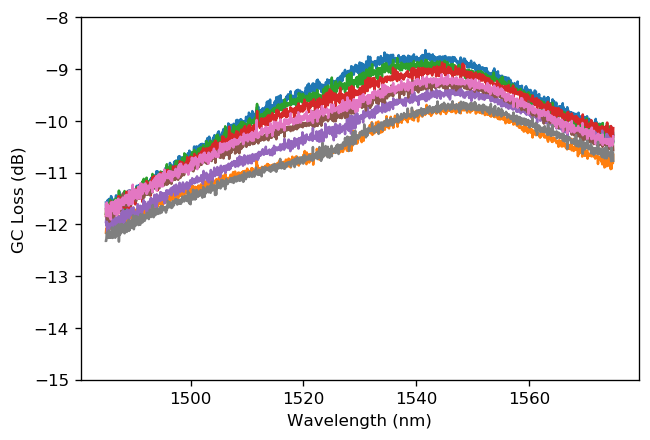

In [15]:
params = {'legend.fontsize': 6,
      'legend.handlelength': 0.5}
plt.rcParams.update(params)
plt.figure(dpi=120)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossA)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossB)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossC)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossD)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossE)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossF)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossG)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossH)
plt.ylabel('GC Loss (dB)')
plt.xlabel('Wavelength (nm)')
plt.ylim(-15,-8)
plt.show()

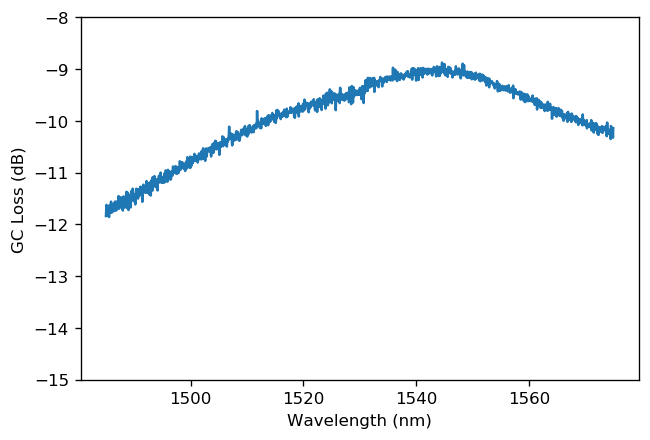

In [16]:
params = {'legend.fontsize': 6,
      'legend.handlelength': 0.5}
plt.rcParams.update(params)
plt.figure(dpi=120)
plt.plot(FtfLoss.loc[:,'Wavelength'],GCLossD)
plt.ylabel('GC Loss (dB)')
plt.xlabel('Wavelength (nm)')
plt.ylim(-15,-8)
plt.savefig('output/GCLoss.png',dpi=300)
plt.show()

In [17]:
df_ap = pd.DataFrame(mlist,indices)

In [23]:
df_ap.T

,1485.0,1490.0,1495.0,1500.0,1505.0,1510.0,1515.0,1520.0,1525.0,1530.0,1535.0,1540.0,1545.0,1550.0,1555.0,1560.0,1565.0,1570.0
0,0.383696,0.401739,0.463,0.550106,0.65408,0.709024,0.886232,0.86907,0.941406,0.883467,0.866892,0.703603,0.679527,0.551456,0.468411,0.483198,0.432949,0.393566
